In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lambdas = np.array([
  860, 640, 585, 520, 465, 420
])
frequencia = 3e8 / (lambdas * 1e-9)
Voltages = np.array([
  0, 350, 460, 670, 860, 1120]) * 1e-3

In [38]:
import scipy.optimize as opt

def linear(x, a, b):
  return a * x + b

popt, pcov = opt.curve_fit(linear, frequencia, Voltages)[0]
print(popt)

[ 3.02804794e-15 -1.07199330e+00]


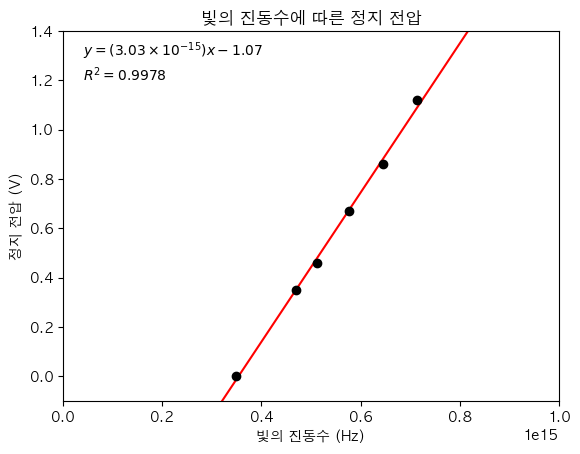

In [53]:
plt.rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
x = np.linspace(0, 1e15, 1000)
R2 = 1 - np.sum((Voltages - linear(frequencia, *popt))**2) / np.sum((Voltages - np.mean(Voltages))**2)
plt.plot(x, linear(x, *popt), 'r-')
plt.plot(frequencia, Voltages, 'o', color='black')
plt.text(0.4e14, 1.2, r'$y = (3.03\times 10^{-15})x - 1.07 $'+ "\n" +r'$R^2 = 0.9978$', fontsize=10)
plt.xlabel('빛의 진동수 (Hz)')
plt.ylabel('정지 전압 (V)')
plt.xlim(0, 1e15)
plt.ylim(-0.1, 1.4)
plt.title(r'빛의 진동수에 따른 정지 전압')
plt.show()